In [17]:
import numpy as np
from nibabel.freesurfer.io import write_geometry
from fmri_tools.surface.mesh import Mesh
from fmri_tools.surface.filter import LaplacianGaussian
import os
import sys
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.sphere import Sphere
plt.style.use(os.path.join(module_path, "src", "default.mplstyle"))

In [14]:
# parameters
SCALE = 7
SUBDIV = 5
T_VEC = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 1.5, 2.0]
N_ITER = 10

# 
period = np.zeros((N_ITER, len(T_VEC)))
for i in range(N_ITER):
    for j, t  in enumerate(T_VEC):

        sphere = Sphere(scale=SCALE)
        sphere.subdivide(SUBDIV)

        filter = LaplacianGaussian(sphere.vtx, sphere.fac, t)
        res = filter.spatial_scale(n_iter=1)

        #print(f"t: {t}; period: {res['period']}")
        period[i, j] = res["period"]

0
1
2
3
4
5
6
7
8
9


# TODO
- get also other parameters (spatial frequency)
- get line fit and and compute the right parameters (for desired periods)
- make nice plot

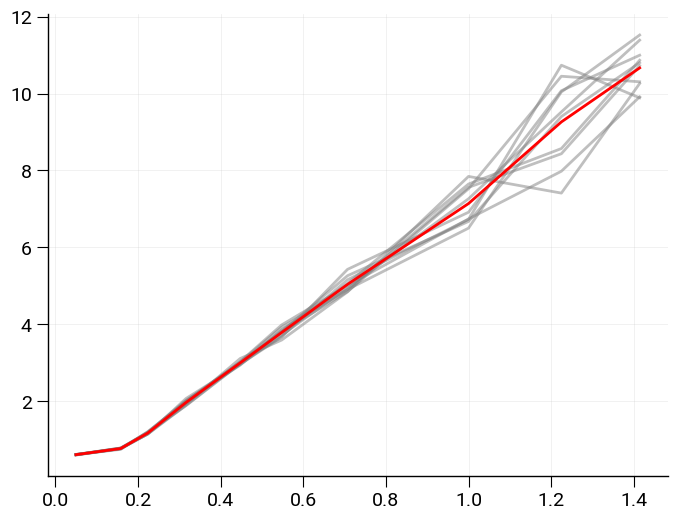

In [29]:
for i in range(N_ITER):
    plt.plot(np.sqrt(t_vec), period[i, :], "gray", alpha=0.5)
plt.plot(np.sqrt(t_vec), np.mean(period, axis=0), color="red")


In [75]:
x = np.linspace(0, 1.0, 10)
print(x)
x = x**2
#plt.plot(x)
print(x)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.01234568 0.04938272 0.11111111 0.19753086 0.30864198
 0.44444444 0.60493827 0.79012346 1.        ]
